### Import the necessary libraries to use in the repo

In [59]:
import pandas as pd
import numpy as np
import math
import time
import matplotlib.pyplot as plt
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pylab as pylab
import luminol
from luminol import utils , anomaly_detector
from luminol.anomaly_detector import AnomalyDetector
import tad.anomaly_detect_ts as detts


### Prepare DateTime Parsers 

In [2]:
def pd_parser(date):
        return pd.datetime.strptime(date, '%Y−%m−%d %H:%M:%S')

def pd_parser2(date):
     return pd.datetime.strptime(date , '%Y/%m/%d %H:%M')

def pd_parser3(date):
     return pd.datetime.strptime(date, '%m/%d/%Y %H:%M')

### We create two functions, set_col_index and sort_time_series to set column index and sort data based on date of data time series respectively


In [6]:
# set index column
class set_col_as_index(TransformerMixin):
    def __init__(self, col):
        self.col = col
    
    def transform (self, X, **transform_params):
        X.index = X.loc[:, self.col].apply(lambda x: pd.to_datetime(x))
        return X
    
    def fit(self, X, y=None, **fit_params):
        return self

In [9]:
#sort data based on the index
class sort_time_series(TransformerMixin):
    def transform(self, X, **transform_params):
        X = X.sort_index( )
        return X
    
    def fit(self, X, y=None, **fit_params):
        return self
    
#Create index and transform the 'TimeStamp' column
def process_data(x):
    process_pipeline = make_pipeline(set_col_as_index('Timestamp'), sort_time_series())
    x = process_pipeline.fit_transform(x)
    del x['Timestamp ']
    return x


### Functions to load data from csv file, process and return the data

In [13]:
# get test data from this directory
def get_temp_data(data_path):
    return pd.read_csv(data_path)

#Method get_ammonia_data is to read water ammonia test data from csv file .
#def get_ammonia_data( ):
#    return pd.read_csv("Ammonia.csv")

data_path = './nyewasco_data.csv'
df = get_temp_data(data_path)
df

,Unnamed: 0,time,turbidity,pH
0,0,2020-11-04 12:00:00.00+00:00,21,7.5
1,1,2020-11-04 14:00:00.00+00:00,20,7.5
2,2,2020-11-04 16:00:00.00+00:00,18,7.5
3,3,2020-11-04 18:00:00.00+00:00,18,7.5
4,4,2020-11-04 20:00:00.00+00:00,19,7.5
...,...,...,...,...
140,187,2020-11-16 04:00:00.00+00:00,16,7.5
141,188,2020-11-16 06:00:00.00+00:00,16,7.5
142,189,2020-11-16 08:00:00.00+00:00,17,7.5
143,190,2020-11-16 10:00:00.00+00:00,12,7.5


### Display the general information on the dataset loaded

In [18]:
def display_info(df):
    print("Data Range \n")
    print("Start Date %s \n"%(df.head(1)['time']))
    print("End Date %s \n "%(df.tail (1)['time']))
    print("Num_values : %s "%(df.shape[0]))
    
    
display_info(df)

Data Range 

Start Date 0    2020-11-04 12:00:00.00+00:00
Name: time, dtype: object 

End Date 144    2020-11-16 12:00:00.00+00:00
Name: time, dtype: object 
 
Num_values : 145 


### Plot the Original Dataset

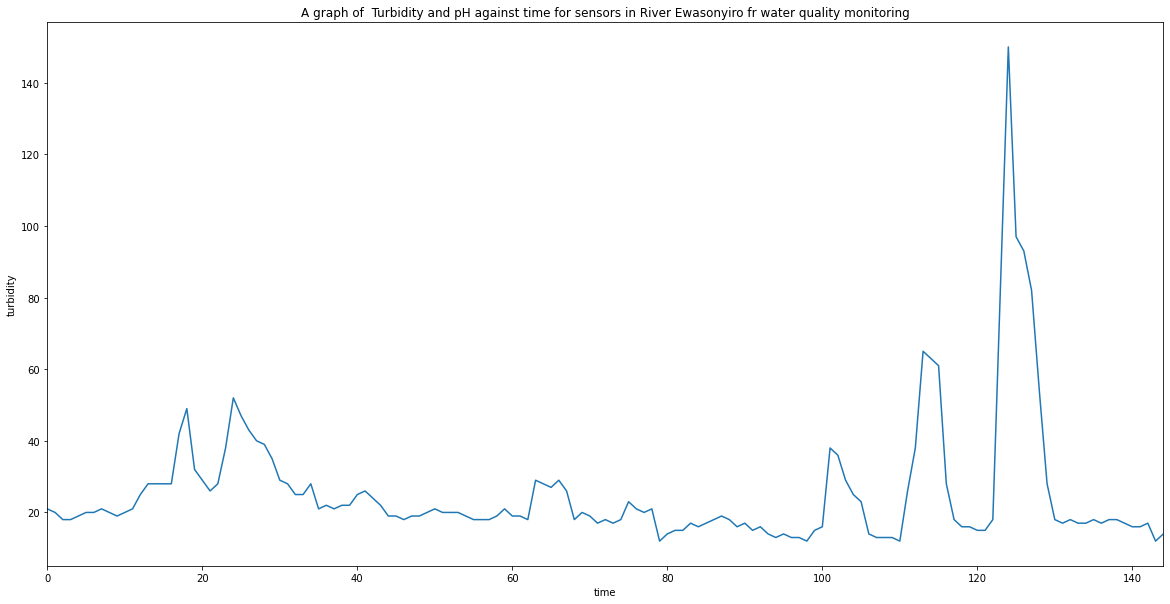

In [21]:
def plot_original_data(df, title):
    f1 = plt.figure(figsize =(20, 10))
    df['turbidity'].plot( )
    plt.xlabel("time")
    plt.xlabel("time")
    plt.ylabel("turbidity")
    plt.title(title)
    plt.show( )
    
    
plot_original_data(df, "A graph of  Turbidity and pH against time for sensors in River Ewasonyiro fr water quality monitoring")

### Prepare traning dataset

In [29]:
def prepare_traning_dataset(df):
    
    #lets get value of dataset
    X = df['turbidity'].values 
    
    # reshape the data to only one column
    X = X.reshape(-1, 1)
    return X
training_data = prepare_traning_dataset(df)
training_data

array([[ 21],
       [ 20],
       [ 18],
       [ 18],
       [ 19],
       [ 20],
       [ 20],
       [ 21],
       [ 20],
       [ 19],
       [ 20],
       [ 21],
       [ 25],
       [ 28],
       [ 28],
       [ 28],
       [ 28],
       [ 42],
       [ 49],
       [ 32],
       [ 29],
       [ 26],
       [ 28],
       [ 38],
       [ 52],
       [ 47],
       [ 43],
       [ 40],
       [ 39],
       [ 35],
       [ 29],
       [ 28],
       [ 25],
       [ 25],
       [ 28],
       [ 21],
       [ 22],
       [ 21],
       [ 22],
       [ 22],
       [ 25],
       [ 26],
       [ 24],
       [ 22],
       [ 19],
       [ 19],
       [ 18],
       [ 19],
       [ 19],
       [ 20],
       [ 21],
       [ 20],
       [ 20],
       [ 20],
       [ 19],
       [ 18],
       [ 18],
       [ 18],
       [ 19],
       [ 21],
       [ 19],
       [ 19],
       [ 18],
       [ 29],
       [ 28],
       [ 27],
       [ 29],
       [ 26],
       [ 18],
       [ 20],
       [ 19],
      

### Reshape traning dataset

In [28]:
def reshape_traning_dataset(df):
    
    #lets get value of dataset
    X = df['turbidity'].values 
    
    #lets change the value of precision to 2    
    X = np.round(X, 2)
    
    # reshape the data to only one column
    X = X.reshape(-1, 1)
    return X

reshaped_data = reshape_traning_dataset(df)
reshaped_data

array([[ 21],
       [ 20],
       [ 18],
       [ 18],
       [ 19],
       [ 20],
       [ 20],
       [ 21],
       [ 20],
       [ 19],
       [ 20],
       [ 21],
       [ 25],
       [ 28],
       [ 28],
       [ 28],
       [ 28],
       [ 42],
       [ 49],
       [ 32],
       [ 29],
       [ 26],
       [ 28],
       [ 38],
       [ 52],
       [ 47],
       [ 43],
       [ 40],
       [ 39],
       [ 35],
       [ 29],
       [ 28],
       [ 25],
       [ 25],
       [ 28],
       [ 21],
       [ 22],
       [ 21],
       [ 22],
       [ 22],
       [ 25],
       [ 26],
       [ 24],
       [ 22],
       [ 19],
       [ 19],
       [ 18],
       [ 19],
       [ 19],
       [ 20],
       [ 21],
       [ 20],
       [ 20],
       [ 20],
       [ 19],
       [ 18],
       [ 18],
       [ 18],
       [ 19],
       [ 21],
       [ 19],
       [ 19],
       [ 18],
       [ 29],
       [ 28],
       [ 27],
       [ 29],
       [ 26],
       [ 18],
       [ 20],
       [ 19],
      

In [43]:
clf = LocalOutlierFactor(n_neighbors=50, metric='euclidean')

def lof_prediction(clf, training_data_set, data_set):
    
    #fit clf with training data set
    y_pred = clf.fit_predict(training_data_set)
    
    #Get the prediction score
    y_pred = clf._decision_function(training_data_set)
    
    # combine training data and prediction result
    data_set['isinlier'] = y_pred
    
    #datascores less than -10  are outliers, we get them 
    anomalies = data_set.loc[data_set['isinlier']< -10]
    data_set
    return anomalies

anomalies = lof_prediction(clf, training_data, df)
anomalies

,Unnamed: 0,time,turbidity,pH,isinlier
124,171,2020-11-14 20:00:00.00+00:00,150,7.4,-10.521599


### Plot the result of LOF anomaly detection

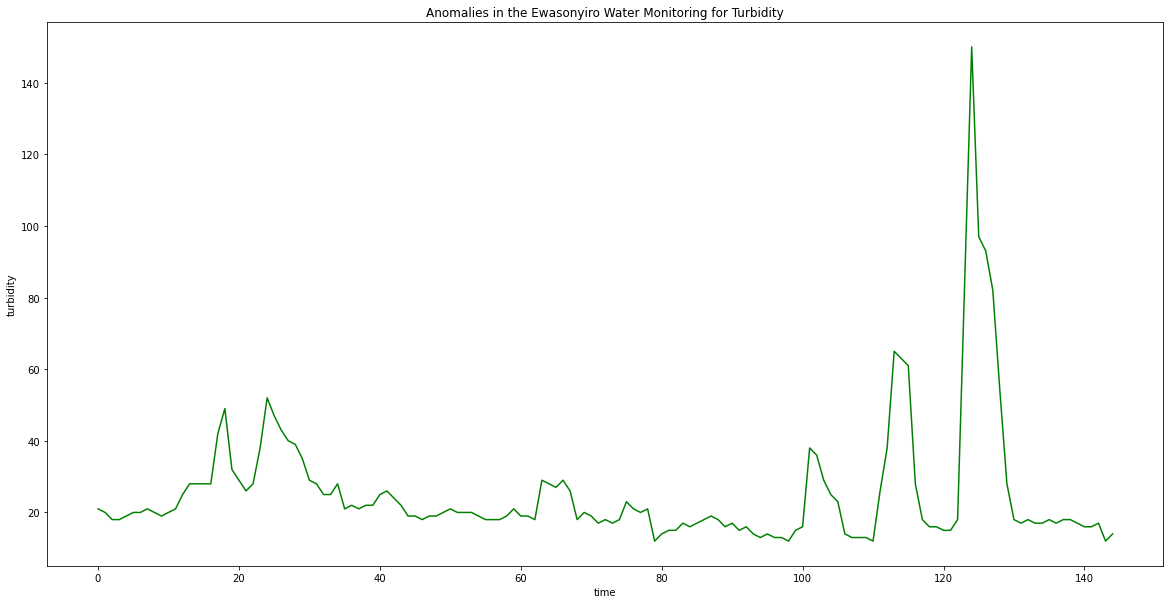

In [47]:
# lets plot the result of LOF anomaly detection
def plot_lof_result(dataset, anomalies, title):
    if 'isinlier' in dataset.columns:
        del dataset['isinlier']
        
    if 'isinlier' in anomalies.columns:
        del anomalies['isinlier']
        
    f2 = plt.figure(figsize =(20, 10))
    plt.plot(dataset['turbidity'], color='green')
    plt.plot(anomalies['turbidity'], "r", markersize =10)
    plt.xlabel("time")
    plt.ylabel("turbidity")
    plt.title(title)
    plt.show()
    
    
plot_lof_result(df, anomalies, "Anomalies in the Ewasonyiro Water Monitoring for Turbidity")


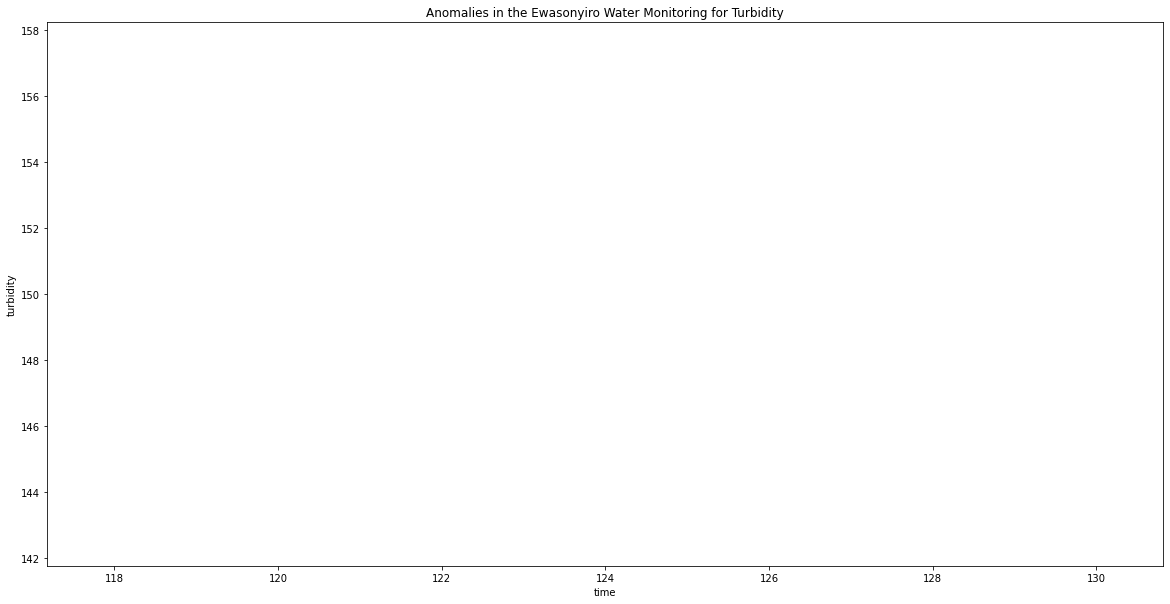

In [48]:
# lets plot the result of LOF anomaly detection
def plot_lof_result(dataset, anomalies, title):
    if 'isinlier' in dataset.columns:
        del dataset['isinlier']
        
    if 'isinlier' in anomalies.columns:
        del anomalies['isinlier']
        
    f2 = plt.figure(figsize =(20, 10))
    plt.plot(anomalies['turbidity'], "r", markersize =10)
    plt.xlabel("time")
    plt.ylabel("turbidity")
    plt.title(title)
    plt.show()
    
    
plot_lof_result(df, anomalies, "Anomalies in the Ewasonyiro Water Monitoring for Turbidity")


### Score each data using Local Outlier Factor (LOF) inside subset and return the scores less than 10, the outliers 

In [58]:
#return : Anomalies

#y = subset of test dataset, we can use the whole df in our case
#clf Instance of Class Local Outlier Factor of Scikit−learnlibrary
def get_anormalies(y, clf):
    y.is_copy = False
    y_pred = clf._decision_function(y)
    y['isinlier'] = y_pred
    return y.loc[y[ ' isinlier'] <-10]

get_anormalies(reshaped_data, clf)


AttributeError: 'numpy.ndarray' object has no attribute 'is_copy'

### Get the outlier of the dataser by dividing it into subsets, it returns the accumulated anormalies

In [45]:
def calculate_outlier(x, window_size, clf):
    
    length = x.shape[0]
    result = pd.DataFrame(columns = x.columns)
    i = 0
    
    while i < length :
        begin_index = i
        i += window_size
        end_index = i
        if(i > length):
            end_index = length
        y = x.iloc[begin_index : end_index]
        y.is_copy = False
        yield get_anormalies(y, clf)


### Display Result for Luminol, return anomalies

In [46]:
def format_luminol_result(anomalies, display):
    rows_list = []
    i =1
    for timestamp in anomalies:
        start = time.localtime(timestamp.start_timestamp / 1000)
        start_str = time.strftime('%Y−%m−%d %H:%M:%S ' , start)
        end = time.localtime(timestamp.end_timestamp / 1000)
        end_str = time.strftime('%Y−%m−%d %H:%M:%S' , end)
        exact = time.localtime(timestamp.exact_timestamp / 1000)
        ex_str = time.strftime('%Y−%m−%d %H:%M:%S' , exact)
        rows_list.append([i, start_str , end_str, ex_str])
        if display:
            print("Anomaly %s : "%( i ))
            print("Start : %s "%(start_str))
            print("End : %s "%(end_str))
            print("Exact : %s "%(ex_str))
        i= i +1
    return pd.DataFrame(rows_list, columns=[ 'Number ' , ' Start On ' ,'End On ' , ' Exactly Happen On'])
